In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

#### 0. Rozkład normalny
Proszę zaprogramować generator zmiennych losowych z rozkładu normalnego N(0,1), korzystając z generatora liczb pseudolosowych rozkładu jednorodnego U(0,1).
Można korzystać z dowolnej metody (centralne twierdzenie graniczne, algorytm Boksa-Muellera, metoda odrzucania, itp.).

Proszę narysować histogram losowanych liczb (można spróbować różny "binning", czyli szerokość pudełek, ale sugeruję https://en.wikipedia.org/wiki/Histogram#Scott's_normal_reference_rule) i porównać dystrybuantę z dystrybuantą teoretyczną.

In [3]:
def box_muller(n_rands: int) -> np.ndarray:
    """
    Generates n random numbers from the normal distribution.
    """
    u1 = np.random.rand(n_rands)
    u2 = np.random.rand(n_rands)
    theta = 2 * np.pi * u1
    r = np.sqrt(-2 * np.log(u2))
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.concatenate((x, y))

Porównanie rozkładu prawdopodobieństwa liczb wygenerowanych metodą Boxa-Mullera oraz teoretycznej funkcji gęstości prawdopodobieństwa dla N(0,1).

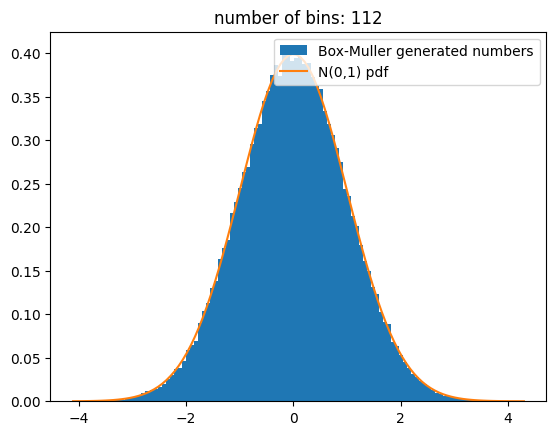

In [4]:
n_rands = 100000
rands = box_muller(n_rands // 2)

bin_width = 3.49 / np.cbrt(n_rands) # Scott's normal reference rule
n_bins = np.ceil((max(rands) - min(rands)) / bin_width).astype(int)

plt.hist(rands, n_bins, density=True, label="Box-Muller generated numbers") # density=True means that the area integral under the histogram will sum to 1

x = np.linspace(np.min(rands), np.max(rands), n_bins)
pdf = np.exp(-0.5*(x**2)) / np.sqrt(2*np.pi) # mu is 0 and sigma is 1
plt.plot(x, pdf, label="N(0,1) pdf")
plt.title(f"number of bins: {n_bins}")
plt.legend();

Dystrybuanta empiryczna reprezentuje, dla każdej wartości w zbiorze danych, ułamek wartości od niej mniejszych lub jej równych. Dla posortowanych danych, będzie to po prostu ich indeks w tablicy, podzielony przez jej długość. Dystrybuanta dla pierwszej wartości będzie wynosiła 1/len, a dla ostatniej - len/len = 1. 

Czym więcej wygenerowanych liczb, tym dokładniejsza jest dystrybuanta empiryczna - dla 1000 próbek bardzo wyraźnie widać lekkie odchylenia, dla 10000 obie dystrybuanty wyglądają niemal identycznie, a dla 100000 nie widzę już (gołym okiem) żadnej różnicy.

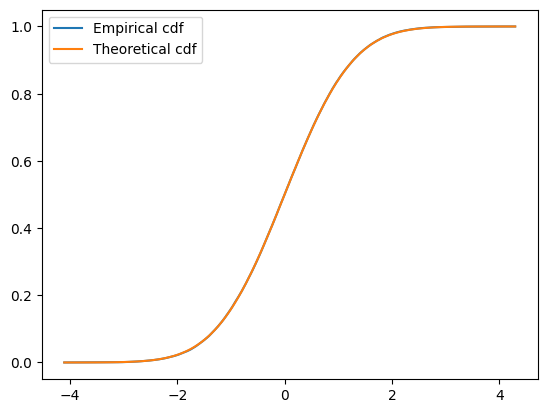

In [5]:
rands_sorted = np.sort(rands)
cdf_empirical = np.arange(1, n_rands+1) / n_rands
plt.plot(rands_sorted, cdf_empirical, label="Empirical cdf")

cdf_theoretical = norm.cdf(x) # The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.
plt.plot(x, cdf_theoretical, label="Theoretical cdf")

plt.legend();